In [1]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving EastWestAirlines.xlsx to EastWestAirlines.xlsx


In [3]:
plane = pd.read_excel('EastWestAirlines.xlsx', sheet_name="data")
plane

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [4]:
plane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
plane.describe()

ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      0.00000           0.000000   
25%       1.000000    1250.000000      3.00000           0.000000   
50%       1.000000    7171.000000     12.00000           0.000000   
75%       1.000000   23800.500000     17.00000         311.000000   
max       5.000000  263685.000000     86.00000       30817.000000   

       Flight_trans_12  Days_since_enroll       Award?  
count      3999.000000         3999.00000  3999.000000  
mean          1.373593         4118.55939     0.370343  
std           3.793172         2065.13454     0.482957  
min           0.000000            2.00000     0.000000  
25%           0.000000         2330.00000     0.000000  
50%           0.000000         4096.00000     0.000000  
75%           1.000000         5790.50000     1.000000  
max          53.000000         8296.00000     1.000000

In [8]:
# Check for missing values
print(plane.isnull().sum())

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


In [9]:
# Remove outliers
Q1 = plane.quantile(0.25)
Q3 = plane.quantile(0.75)
IQR = Q3 - Q1
plane = plane[~((plane < (Q1 - 1.5 * IQR)) | (plane > (Q3 + 1.5 * IQR))).any(axis=1)]
print(plane)

       ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
5        6    16420           0          1          1          1            0   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_m

In [10]:
# Scale the features
X = plane.drop('ID#', axis=1)
X = StandardScaler().fit_transform(X)
print(X)

[[-0.43885929  0.         -0.71905467 ... -0.40970772  1.50369284
  -0.62307163]
 [-0.64773487  0.         -0.71905467 ... -0.40970772  1.48803468
  -0.62307163]
 [-0.1287733   0.         -0.71905467 ... -0.40970772  1.52032964
  -0.62307163]
 ...
 [ 0.62802805  0.          1.01378873 ... -0.40970772 -1.23550729
   1.60495191]
 [ 0.18915227  0.         -0.71905467 ...  1.65318143 -1.23599661
  -0.62307163]
 [-1.02863529  0.         -0.71905467 ... -0.40970772 -1.23746456
  -0.62307163]]


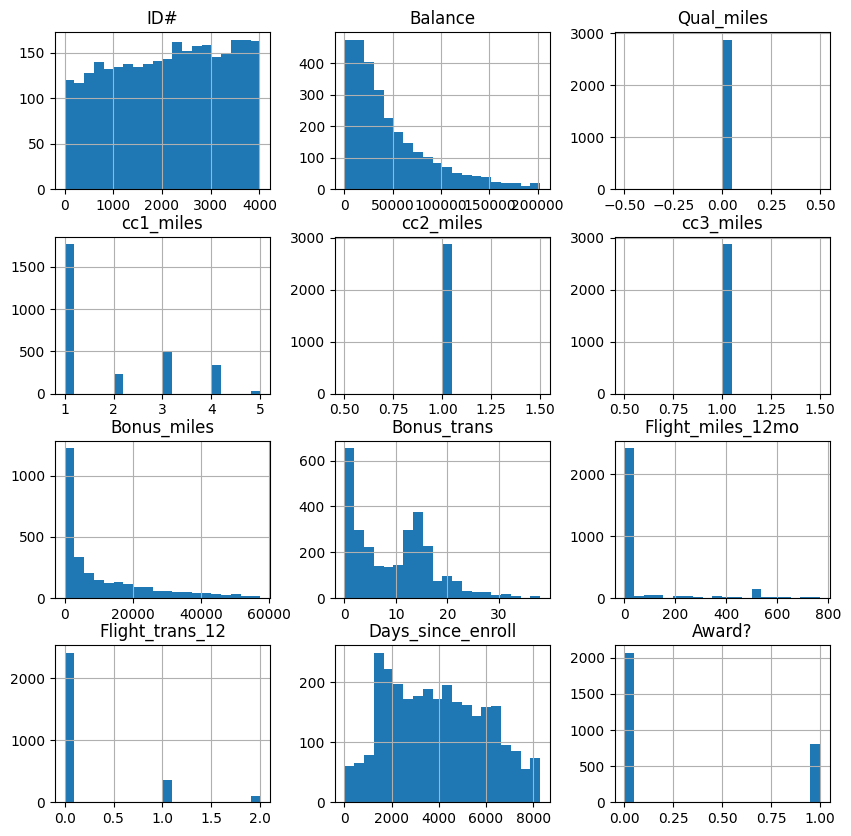

In [11]:
# Plot histograms for numerical features
plane.hist(bins=20, figsize=(10, 10))
plt.show()

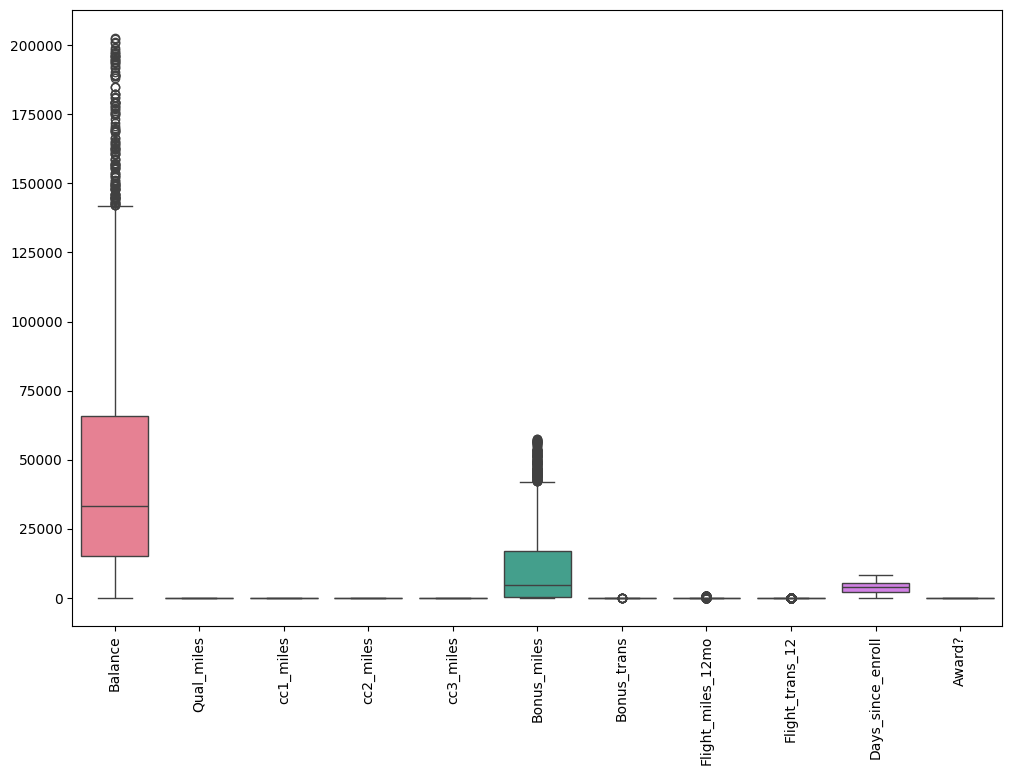

In [12]:
import seaborn as sns
# Plot box plots for numerical features
plt.figure(figsize=(12, 8))
sns.boxplot(data=plane.drop('ID#', axis=1))
plt.xticks(rotation=90)
plt.show()

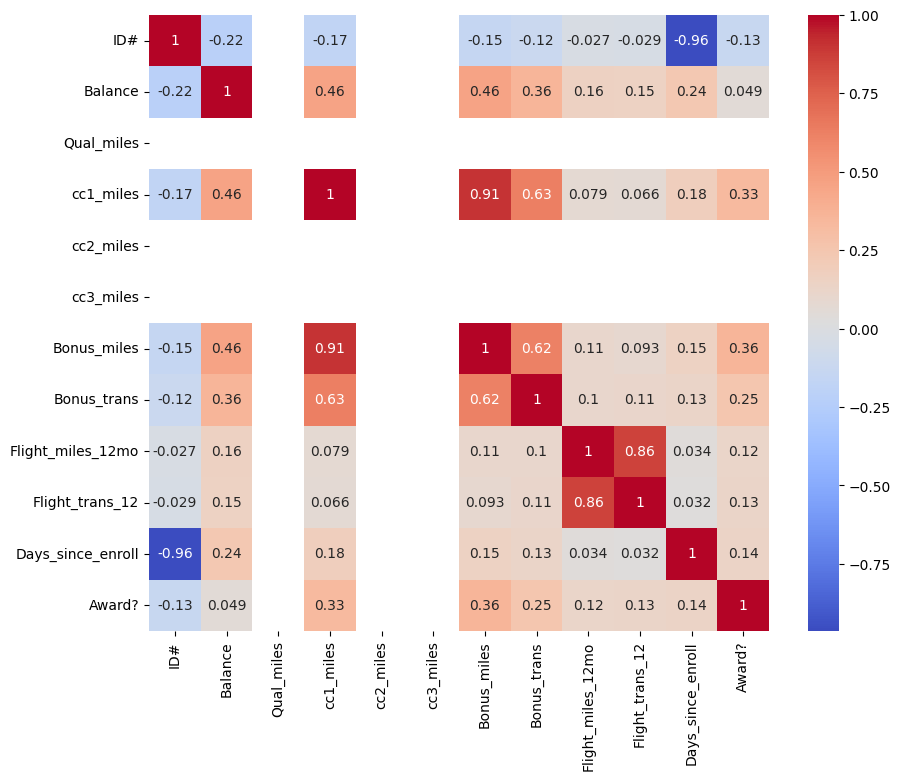

In [13]:
#Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(plane.corr(), annot=True, cmap='coolwarm')
plt.show()

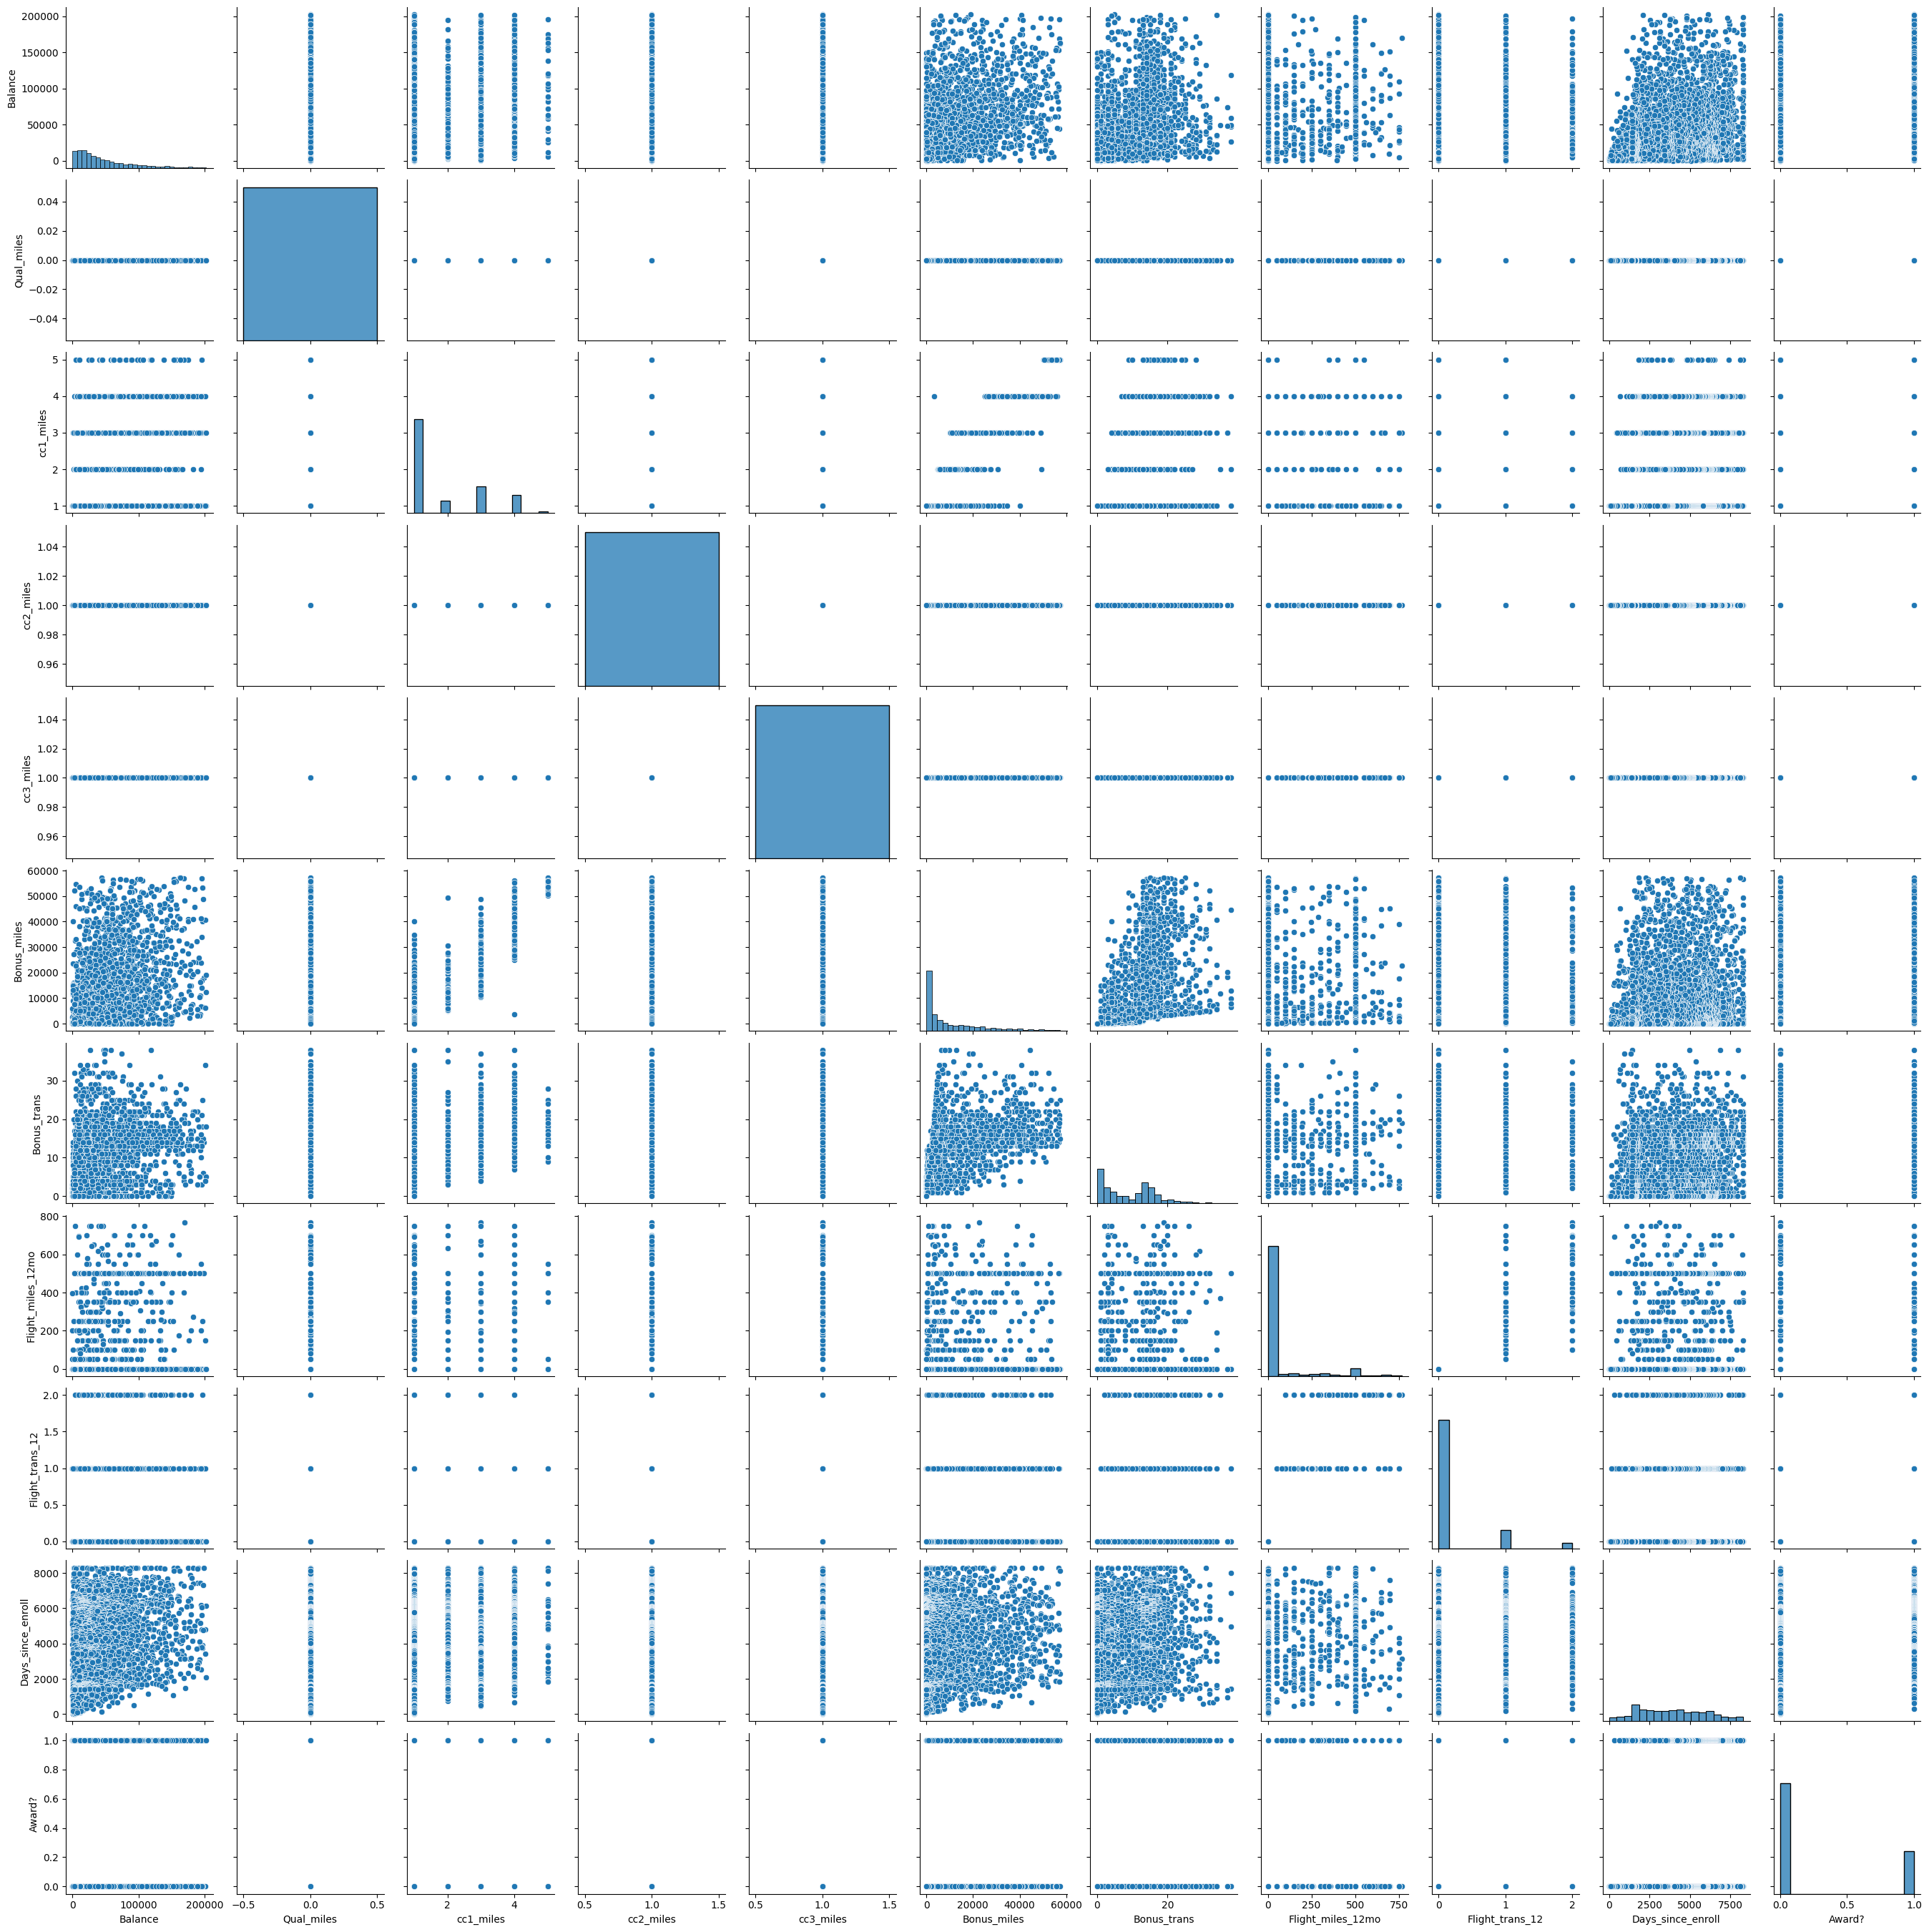

In [14]:
#Pairplot for feature relationships
sns.pairplot(plane.drop('ID#', axis=1))
plt.show()

In [15]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
# Standardize the dataset
scaler = StandardScaler()
scaled_features = scaler.fit_transform(plane.drop(['ID#', 'Award?'], axis=1))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

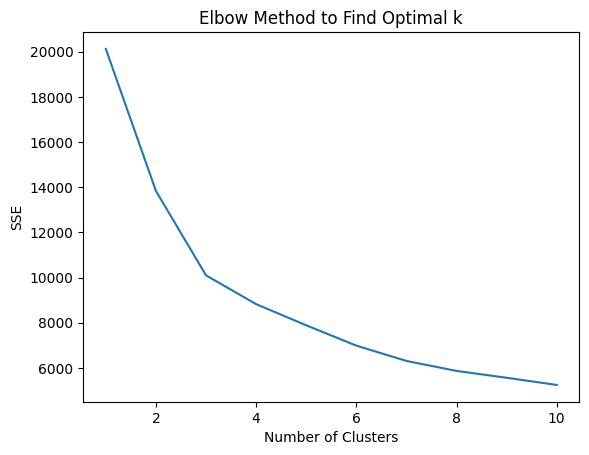

In [16]:
# K-Means Clustering
from sklearn.cluster import KMeans
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

# Plot the SSE to find the elbow
plt.plot(range(1, 11), sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method to Find Optimal k')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-17-f368f4da8ac5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane['Cluster'] = kmeans.fit_predict(scaled_features)


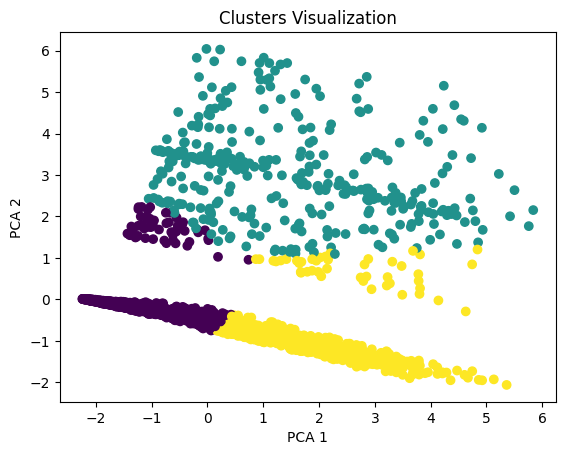

In [17]:
# Applying K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
plane['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualizing the clusters (using PCA for dimensionality reduction)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=plane['Cluster'], cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Clusters Visualization')
plt.show()

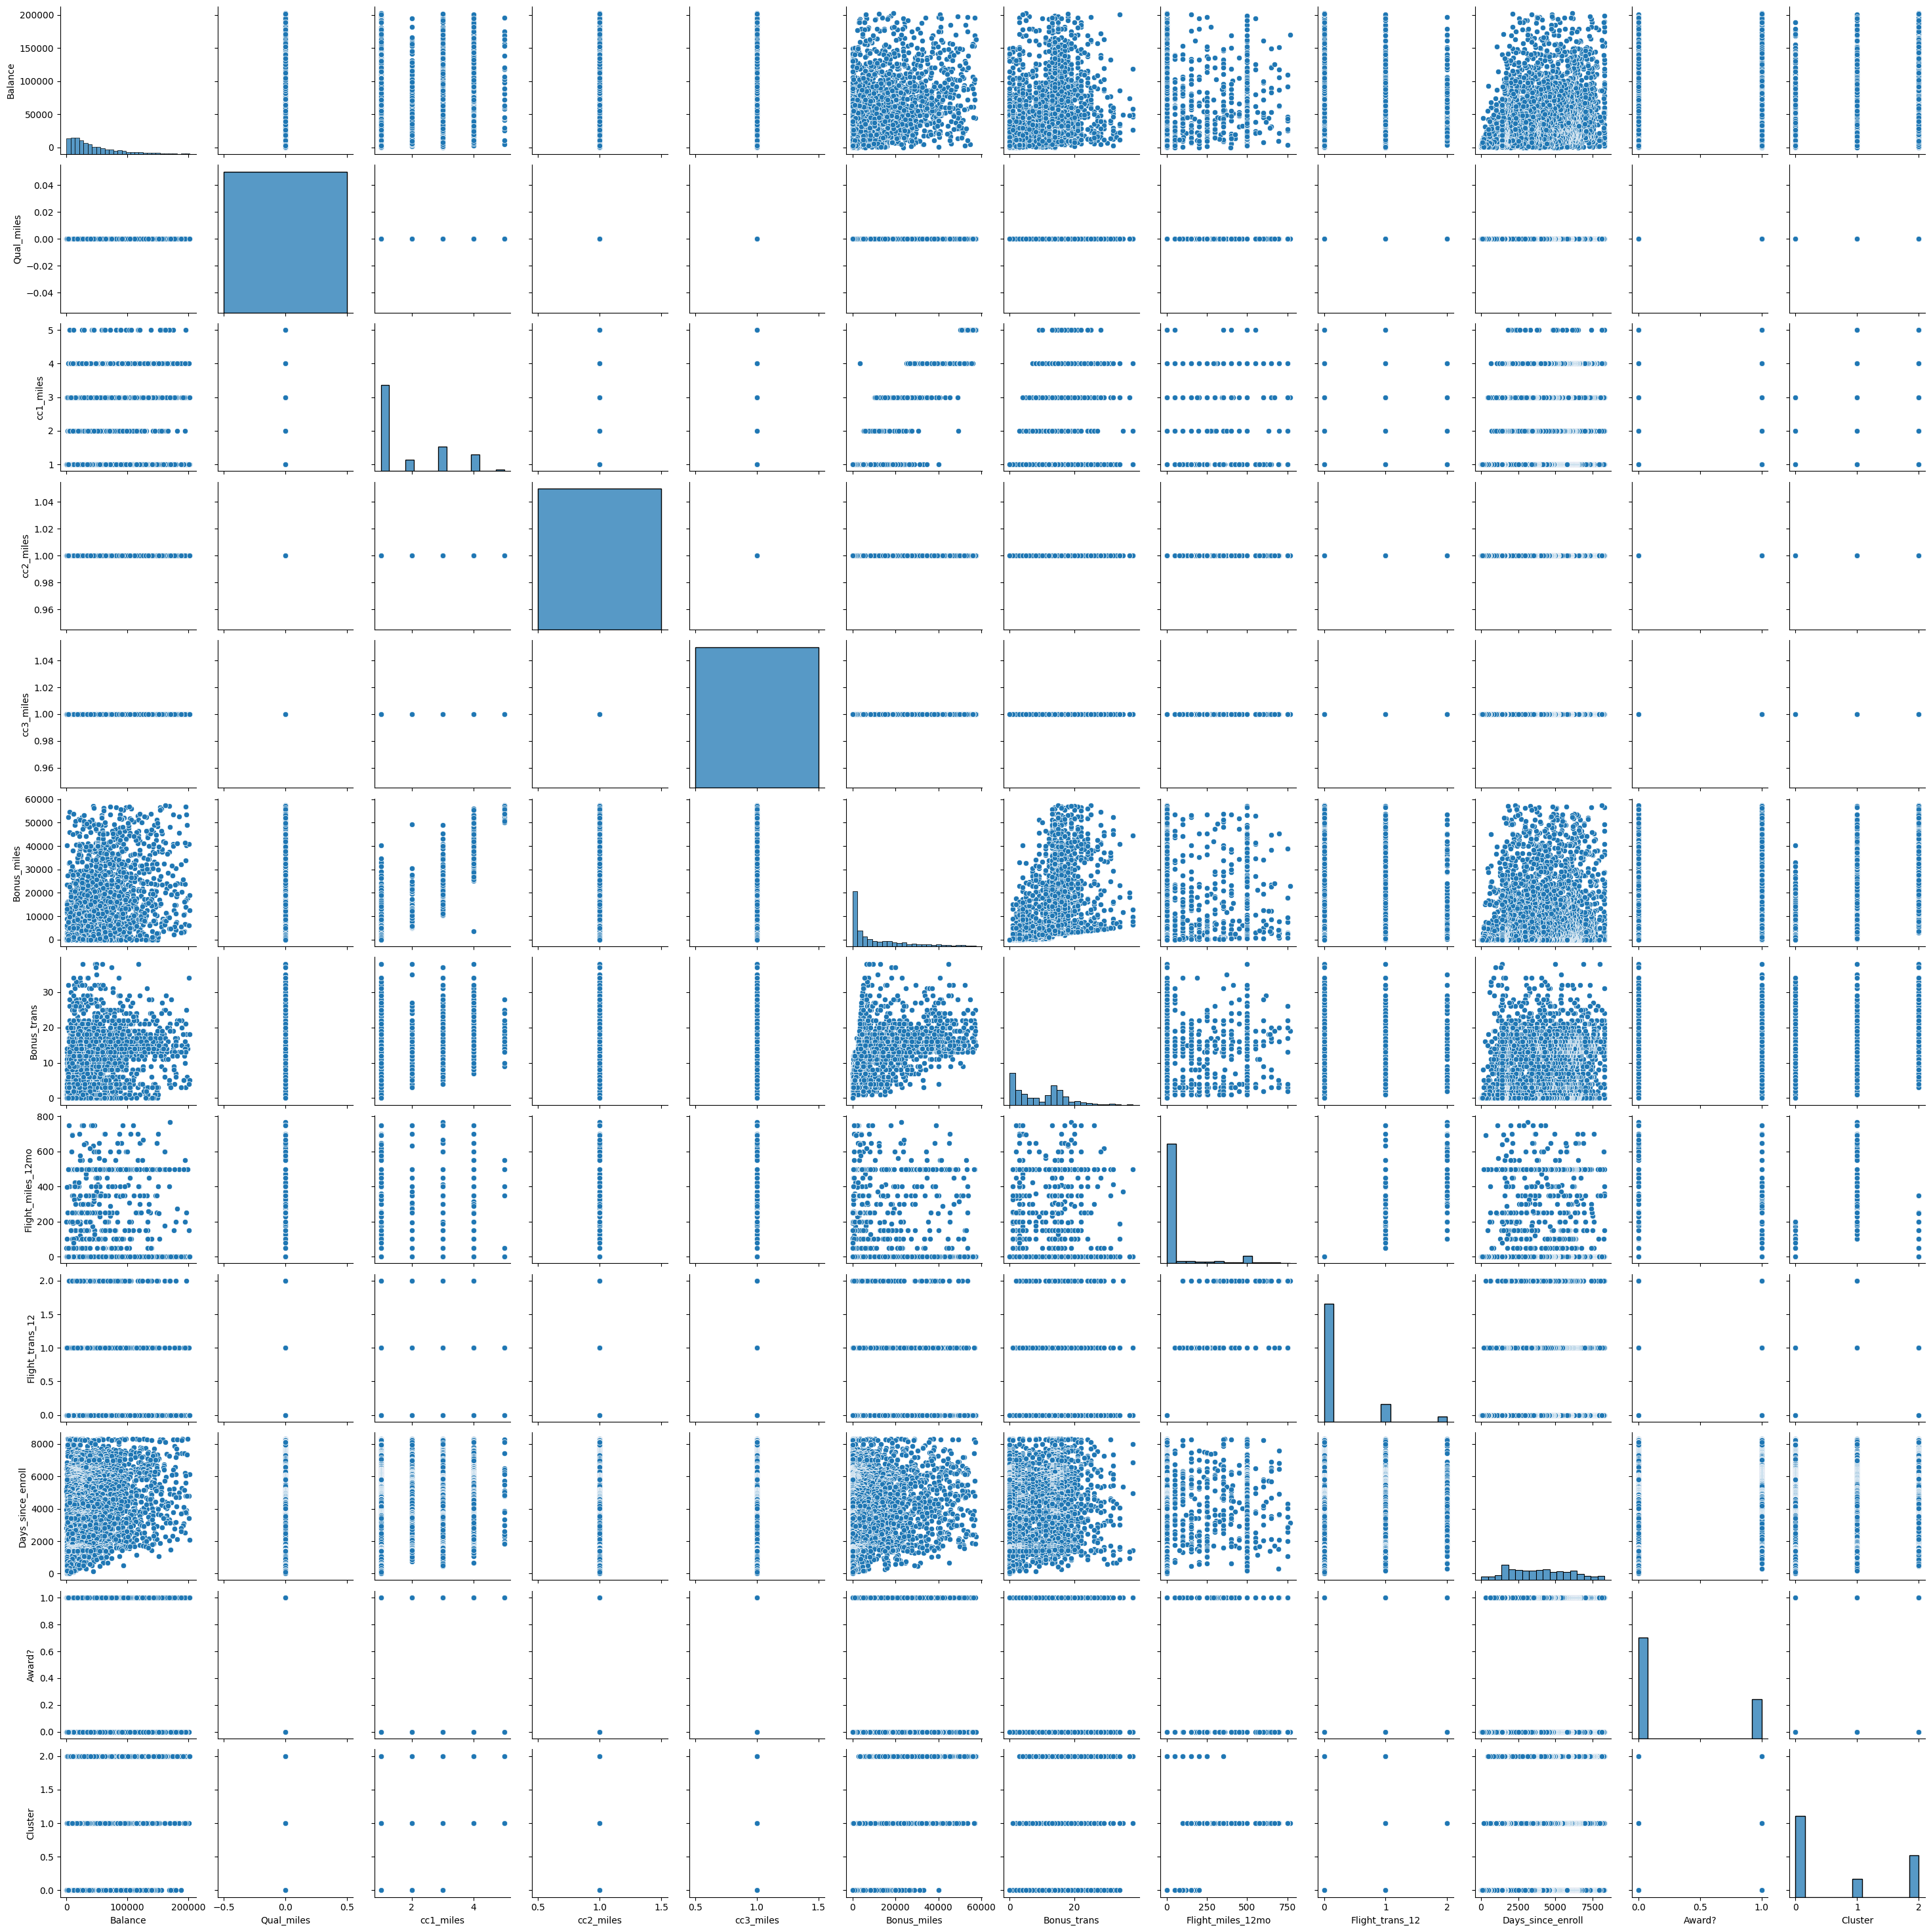

In [18]:
#Silhouette Score
sns.pairplot(plane.drop('ID#', axis=1))
plt.show()

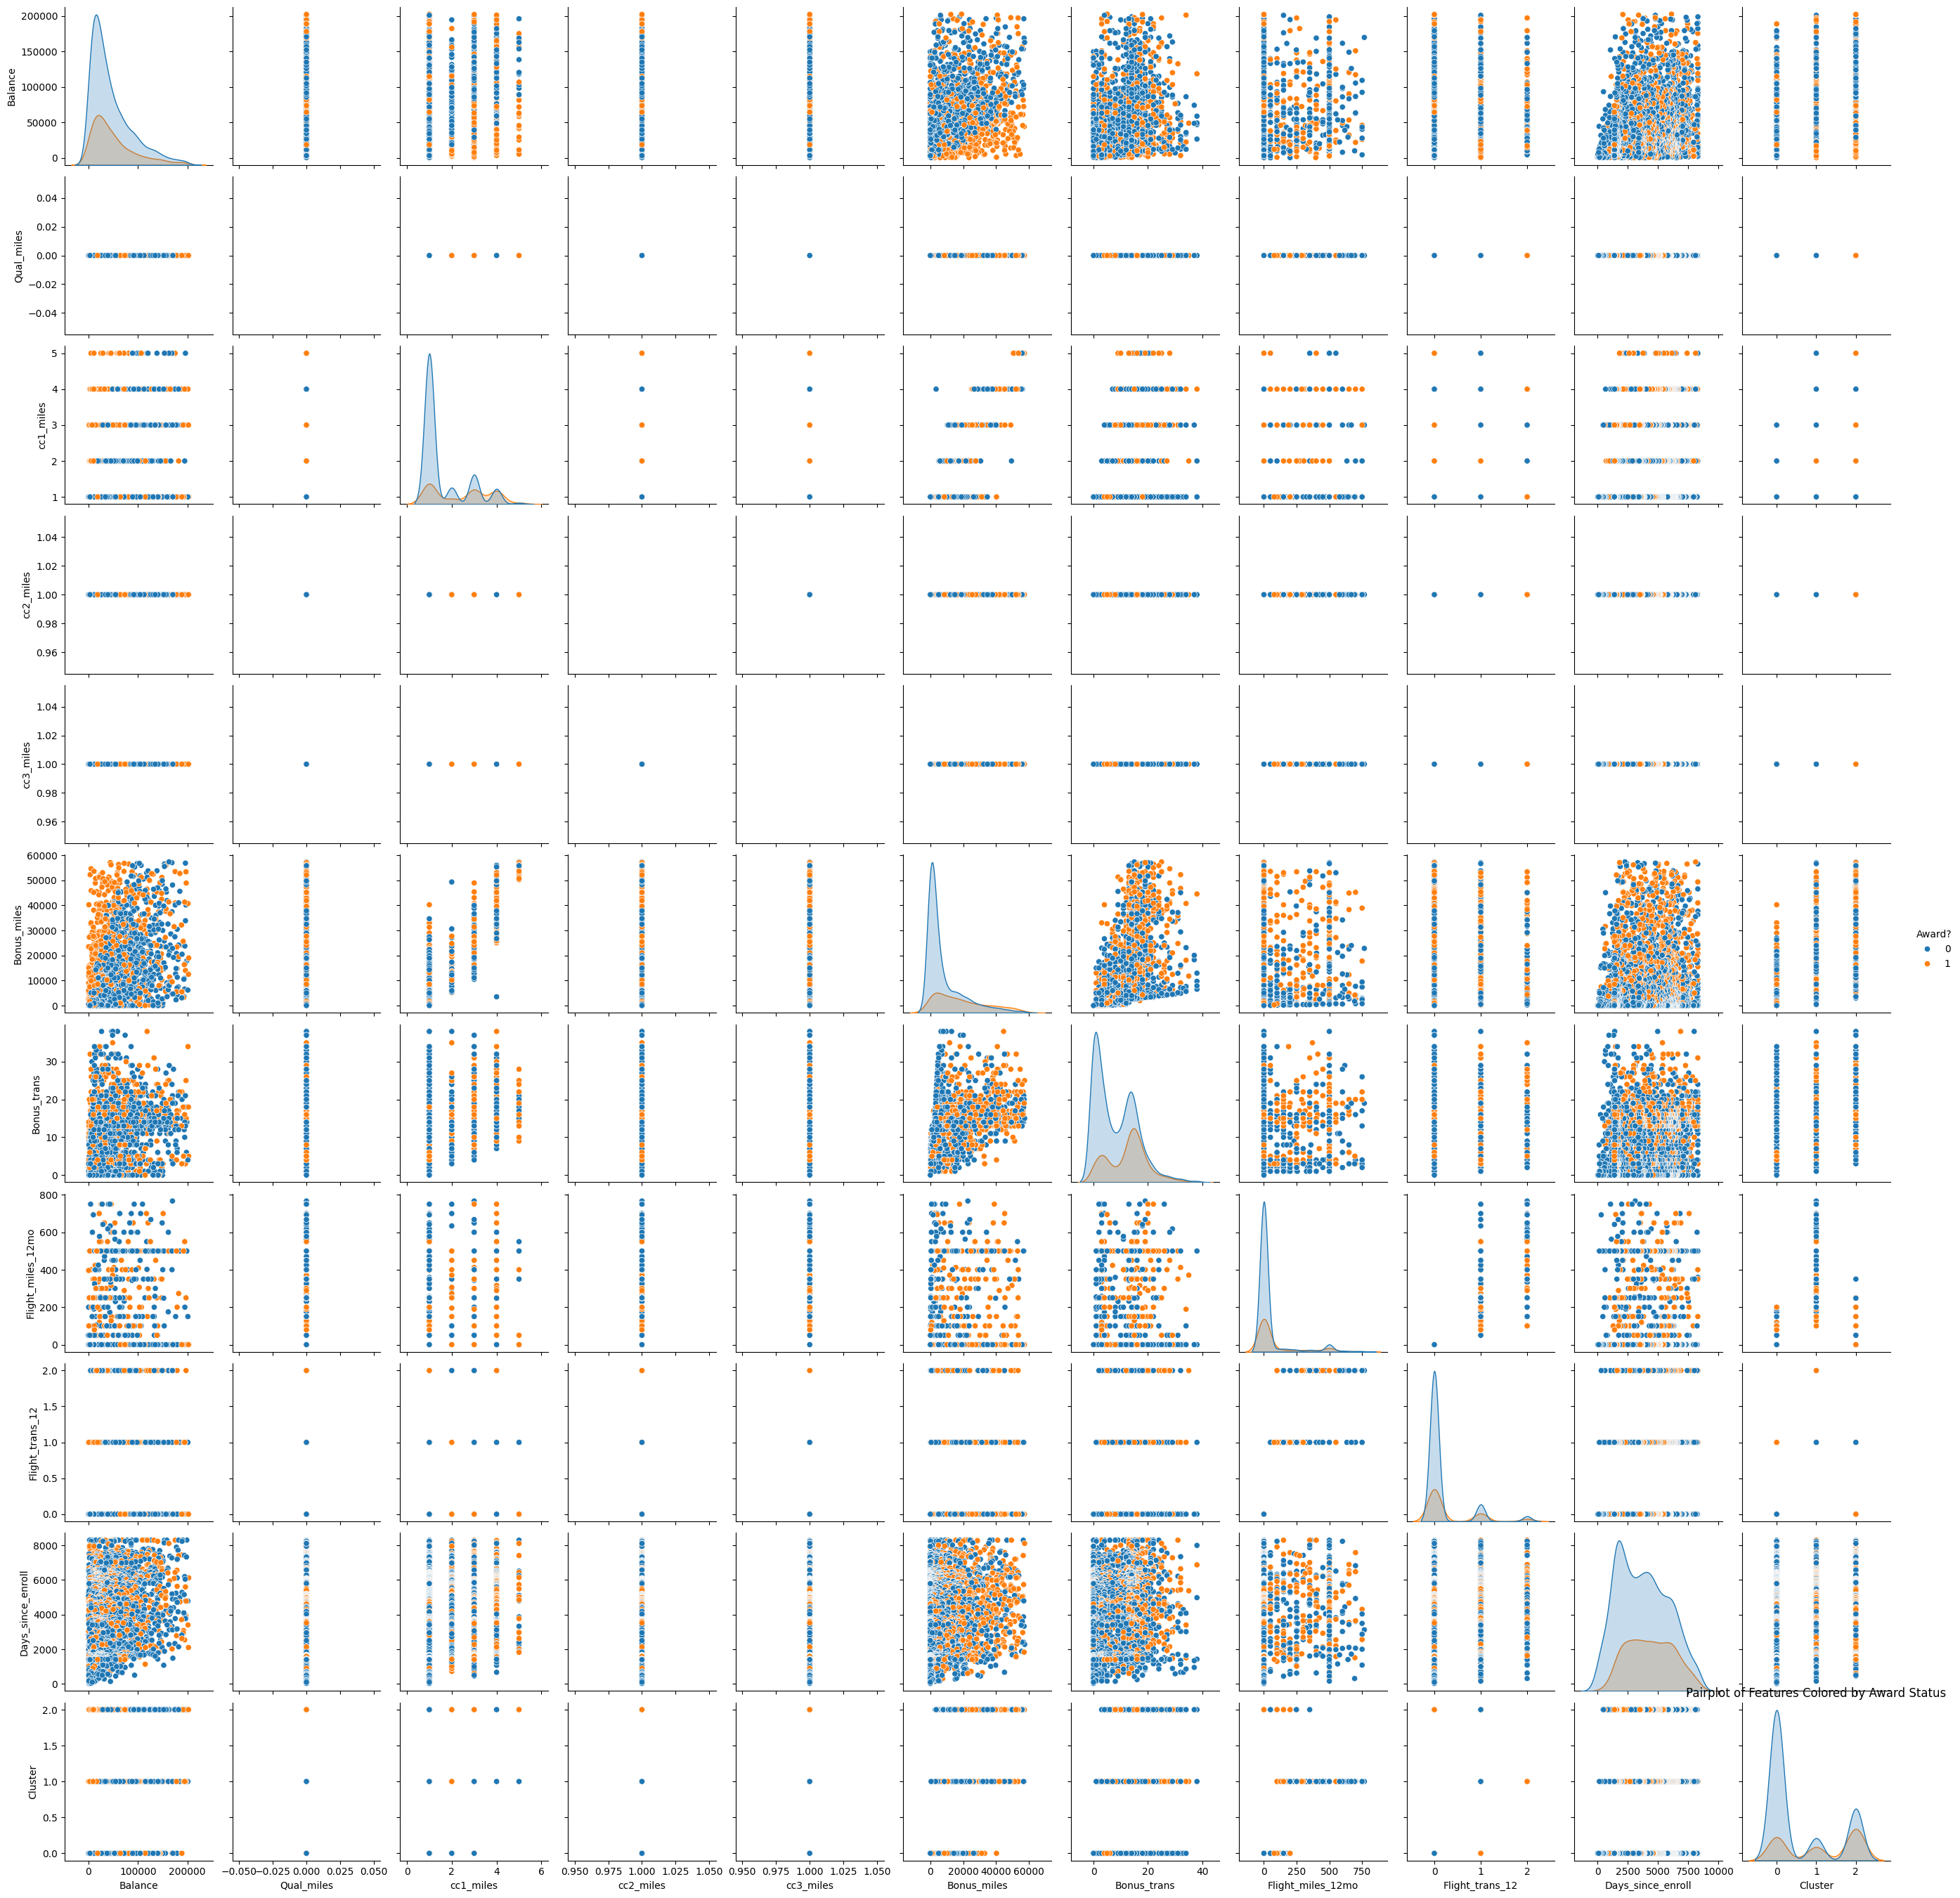

In [19]:
# Pairplot to visualize pairwise relationships between features
sns.pairplot(plane.drop('ID#', axis=1), hue='Award?')
plt.title('Pairplot of Features Colored by Award Status')
plt.show()

<ipython-input-20-ff928ace46d9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Award?', y='Balance', data=plane, palette='Set2')


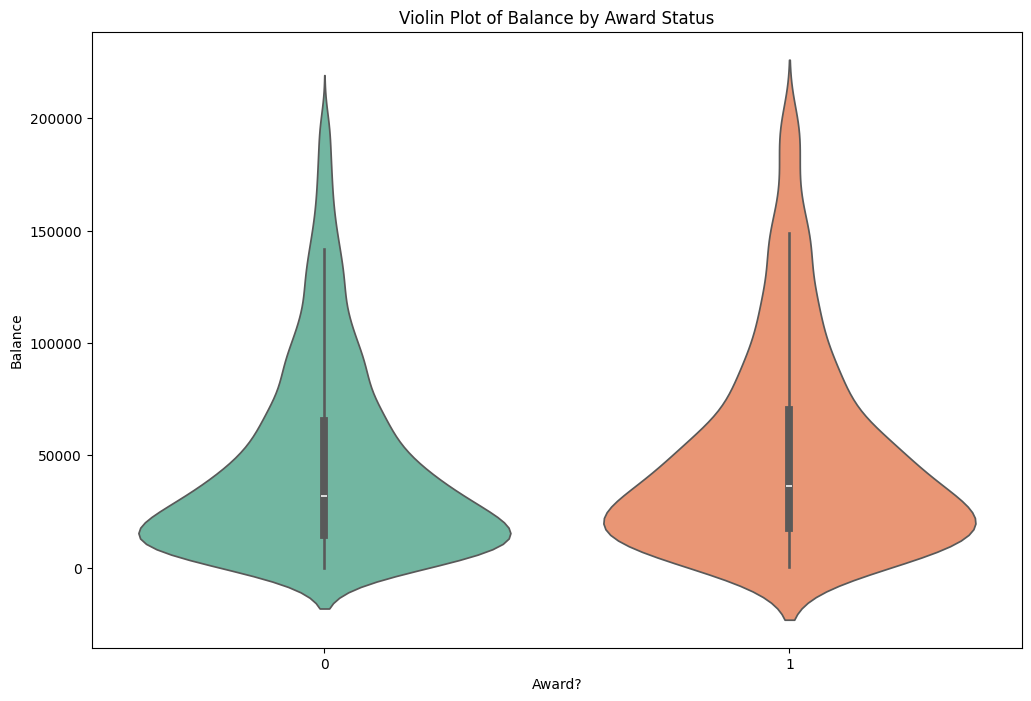

<ipython-input-20-ff928ace46d9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Award?', y='Bonus_miles', data=plane, palette='Set3')


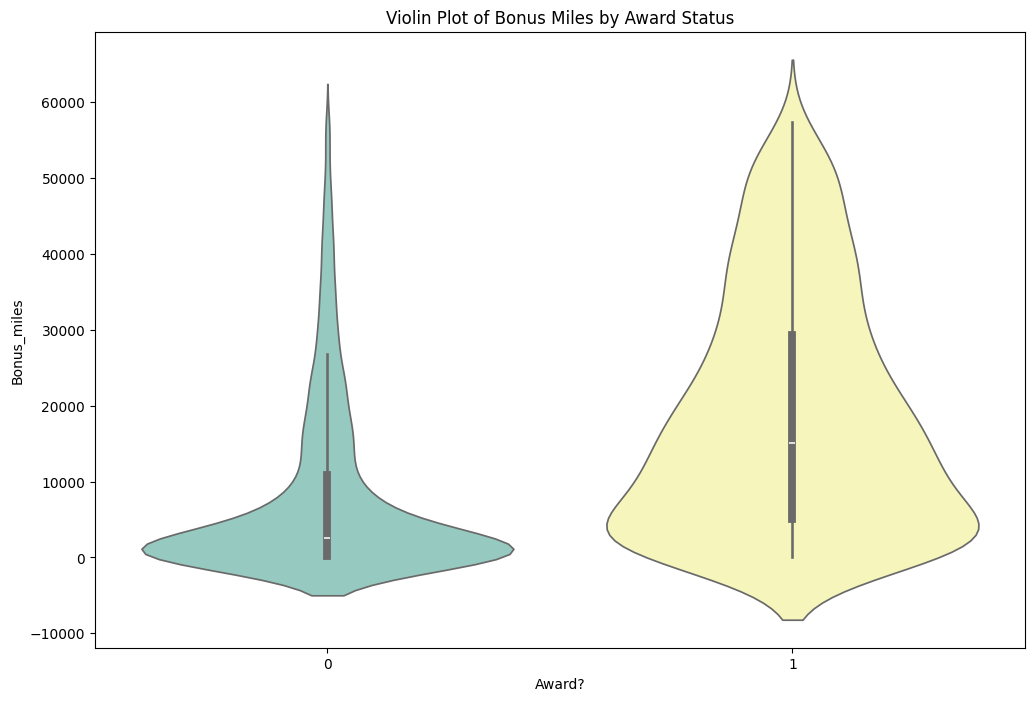

In [20]:
# Violin Plots to Compare Distributions
plt.figure(figsize=(12, 8))
sns.violinplot(x='Award?', y='Balance', data=plane, palette='Set2')
plt.title('Violin Plot of Balance by Award Status')
plt.show()

# Violin plot for another feature
plt.figure(figsize=(12, 8))
sns.violinplot(x='Award?', y='Bonus_miles', data=plane, palette='Set3')
plt.title('Violin Plot of Bonus Miles by Award Status')
plt.show()

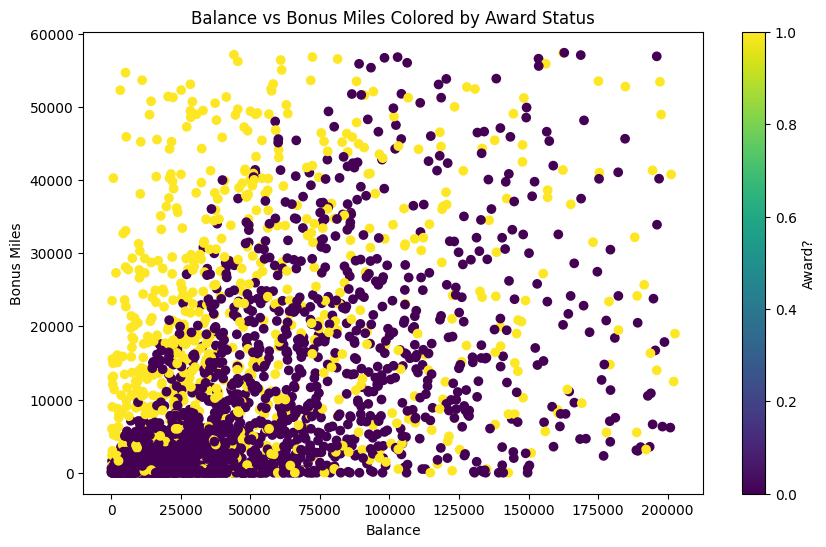

In [21]:
# Pairwise Feature Interaction using Scatter Plots
plt.figure(figsize=(10, 6))
plt.scatter(plane['Balance'], plane['Bonus_miles'], c=plane['Award?'], cmap='viridis')
plt.xlabel('Balance')
plt.ylabel('Bonus Miles')
plt.title('Balance vs Bonus Miles Colored by Award Status')
plt.colorbar(label='Award?')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-22-e284268dbef7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane['Cluster'] = kmeans.fit_predict(scaled_features)


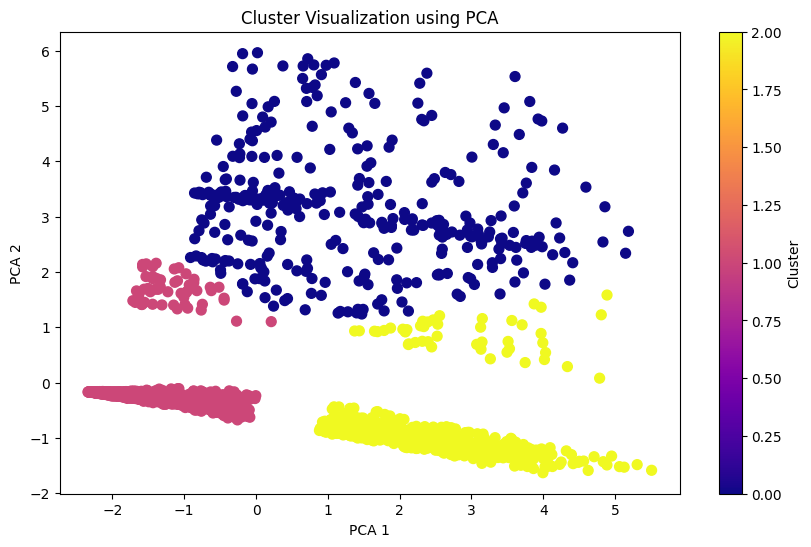

In [22]:
# Cluster Visualization using PCA (Principal Component Analysis)
from sklearn.decomposition import PCA
# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(plane.drop(['ID#', 'Award?'], axis=1))

# Performing K-Means clustering with 3 clusters (or based on elbow method)
kmeans = KMeans(n_clusters=3, random_state=42)
plane['Cluster'] = kmeans.fit_predict(scaled_features)

# Reducing dimensions using PCA for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=plane['Cluster'], cmap='plasma', s=50)
plt.title('Cluster Visualization using PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()

<ipython-input-23-f65e5f015715>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Award?', data=plane, palette='Set1')


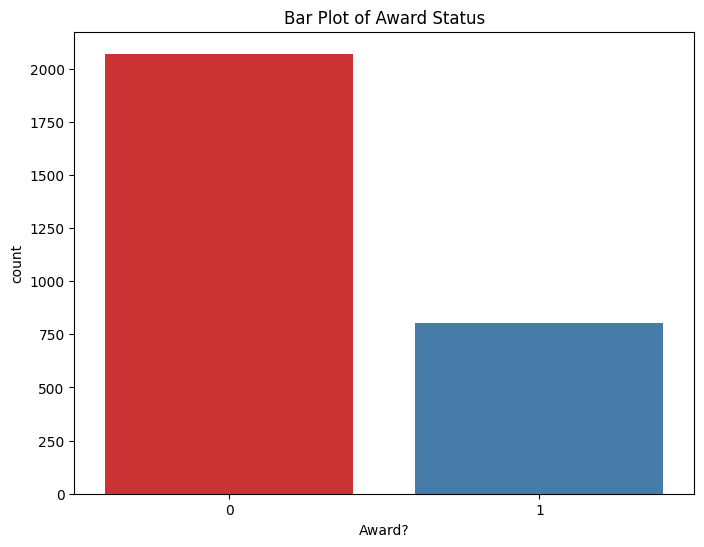

In [23]:
# Bar plot for the 'Award' variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Award?', data=plane, palette='Set1')
plt.title('Bar Plot of Award Status')
plt.show()

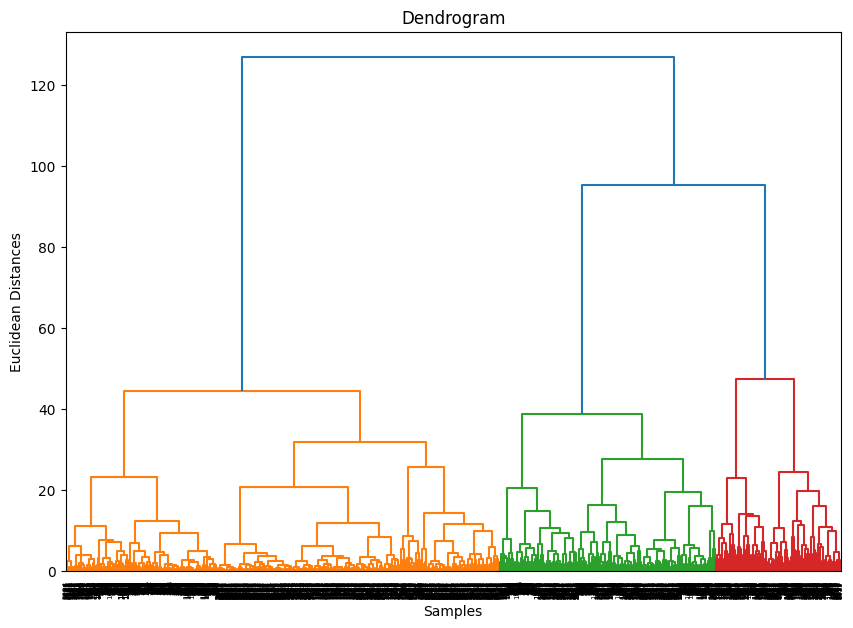

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
<ipython-input-24-e4e37f4e1af6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane['Hierarchical_Cluster'] = hc.fit_predict(scaled_features)


In [24]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Dendrogram to decide the number of clusters
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(scaled_features, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distances')
plt.show()
# Applying Agglomerative Clustering with 3 clusters (based on dendrogram)
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
plane['Hierarchical_Cluster'] = hc.fit_predict(scaled_features)

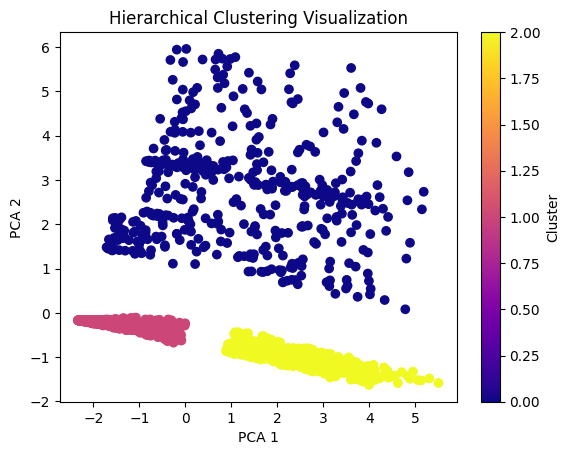

In [25]:
# Visualizing clusters using PCA
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=plane['Hierarchical_Cluster'], cmap='plasma')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Hierarchical Clustering Visualization')
plt.colorbar(label='Cluster')
plt.show()

<ipython-input-26-3e282a34f0b2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_features)


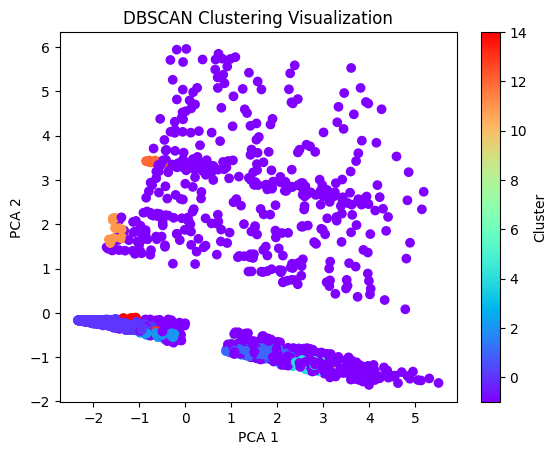

In [26]:
# Applying DBSCAN algorithm (with appropriate parameters)
dbscan = DBSCAN(eps=0.5, min_samples=5)
plane['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_features)

# Visualizing DBSCAN clusters
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=plane['DBSCAN_Cluster'], cmap='rainbow')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('DBSCAN Clustering Visualization')
plt.colorbar(label='Cluster')
plt.show()

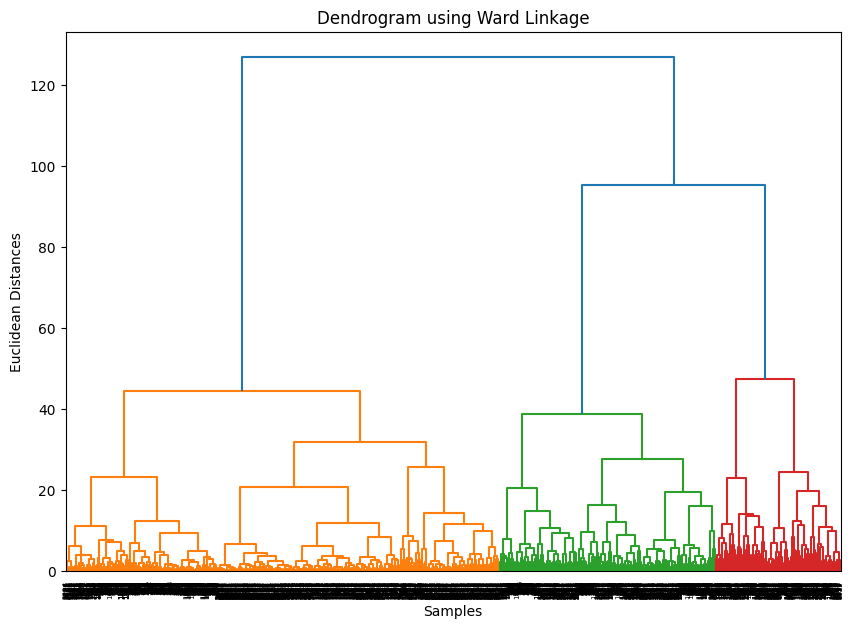

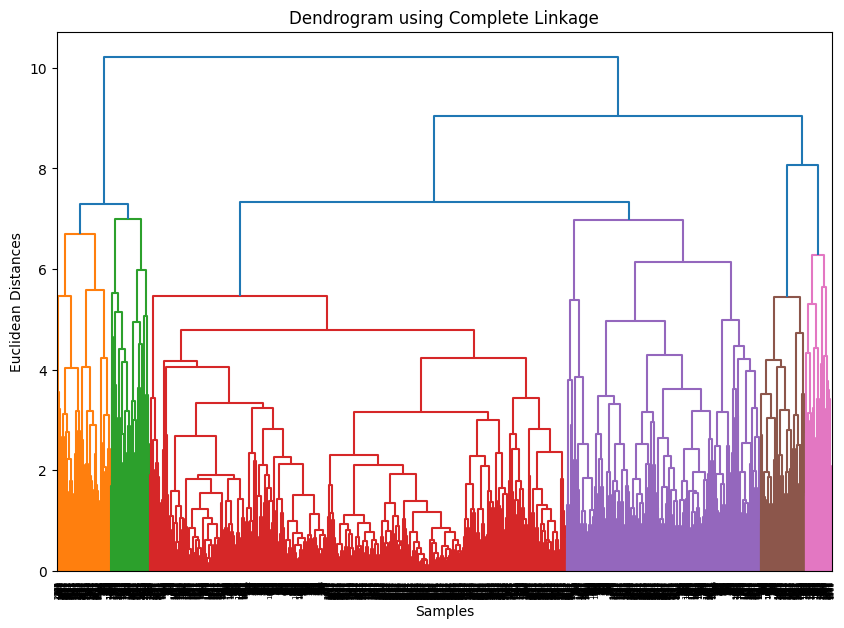

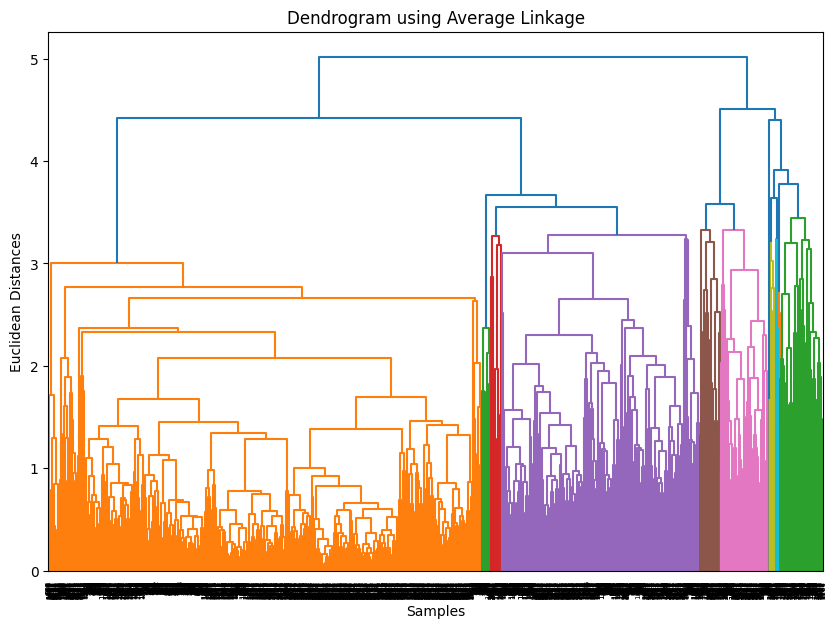

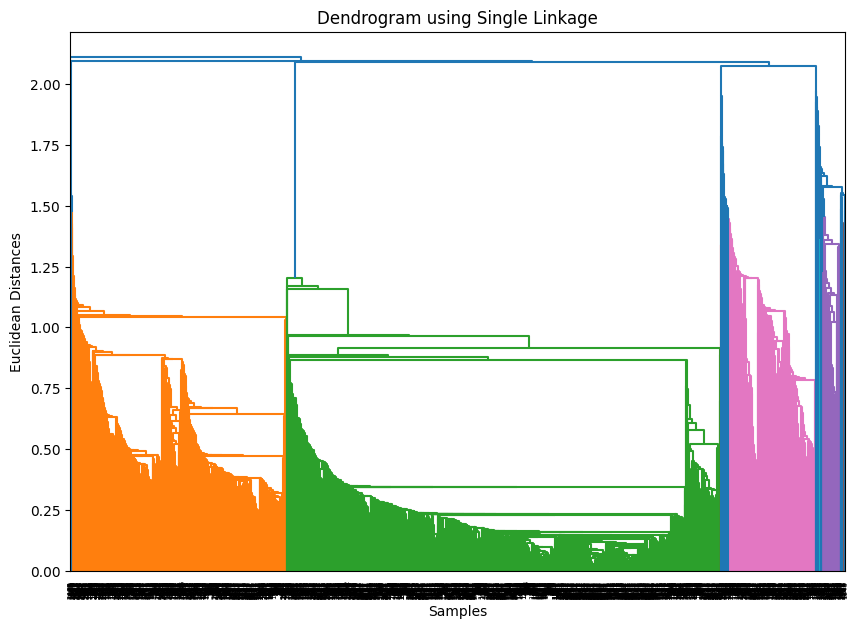

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
<ipython-input-27-556bf4d0b0a2>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane['Hierarchical_Cluster'] = hc.fit_predict(scaled_features)


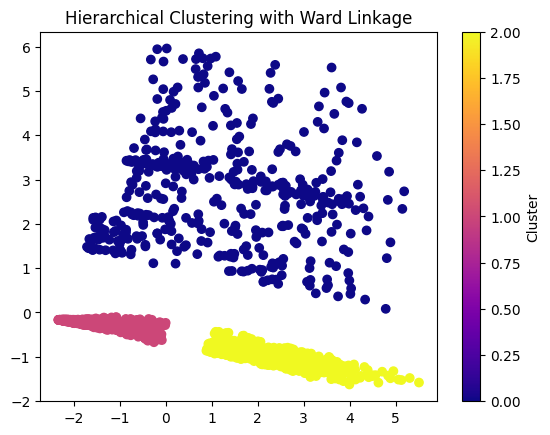

In [27]:
# Plotting dendrograms for different linkage criteria
linkages = ['ward', 'complete', 'average', 'single']

for linkage in linkages:
    plt.figure(figsize=(10, 7))
    sch.dendrogram(sch.linkage(scaled_features, method=linkage))
    plt.title(f'Dendrogram using {linkage.capitalize()} Linkage')
    plt.xlabel('Samples')
    plt.ylabel('Euclidean Distances')
    plt.show()

# Choosing the best linkage based on dendrogram and apply Agglomerative Clustering
optimal_linkage = 'ward'
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage=optimal_linkage)
plane['Hierarchical_Cluster'] = hc.fit_predict(scaled_features)

# Visualization of Hierarchical Clustering clusters
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=plane['Hierarchical_Cluster'], cmap='plasma')
plt.title(f'Hierarchical Clustering with {optimal_linkage.capitalize()} Linkage')
plt.colorbar(label='Cluster')
plt.show()

<ipython-input-28-28ae0680ca38>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_features)


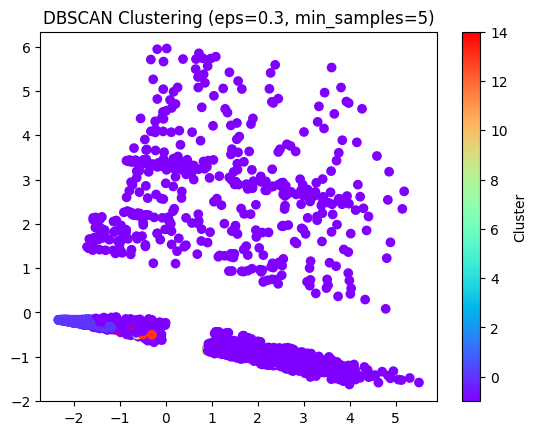

DBSCAN with eps=0.3, min_samples=5 formed 16 clusters


<ipython-input-28-28ae0680ca38>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_features)


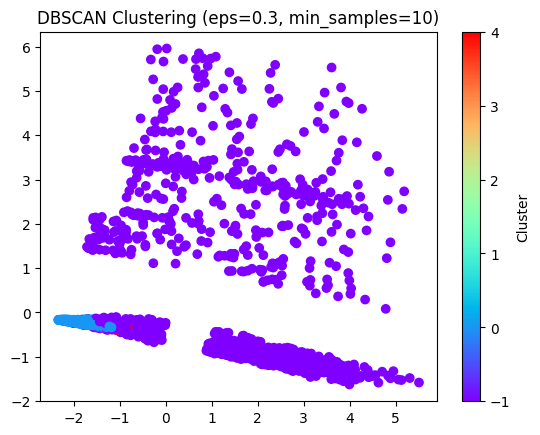

DBSCAN with eps=0.3, min_samples=10 formed 6 clusters


<ipython-input-28-28ae0680ca38>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_features)


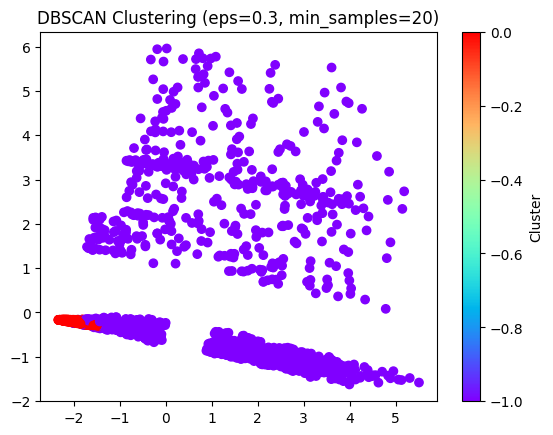

DBSCAN with eps=0.3, min_samples=20 formed 2 clusters


<ipython-input-28-28ae0680ca38>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_features)


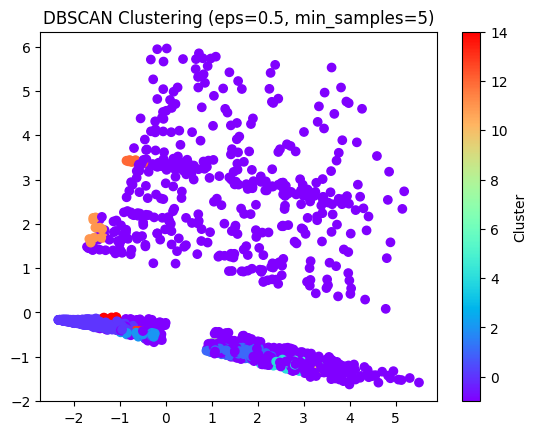

DBSCAN with eps=0.5, min_samples=5 formed 16 clusters


<ipython-input-28-28ae0680ca38>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_features)


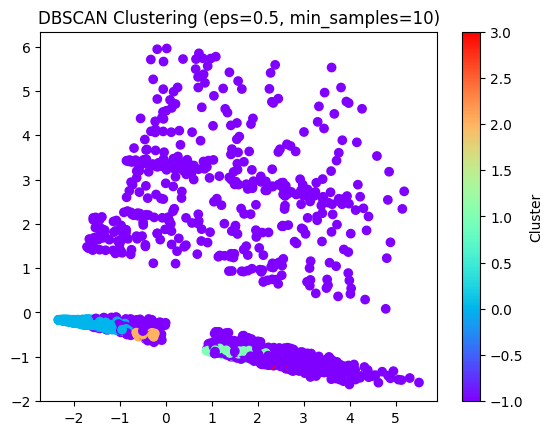

DBSCAN with eps=0.5, min_samples=10 formed 5 clusters


<ipython-input-28-28ae0680ca38>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_features)


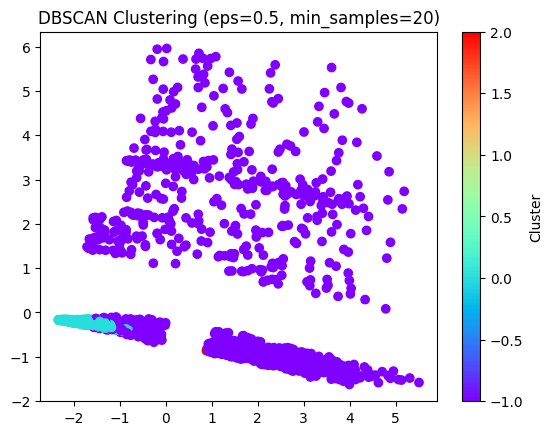

DBSCAN with eps=0.5, min_samples=20 formed 4 clusters


<ipython-input-28-28ae0680ca38>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_features)


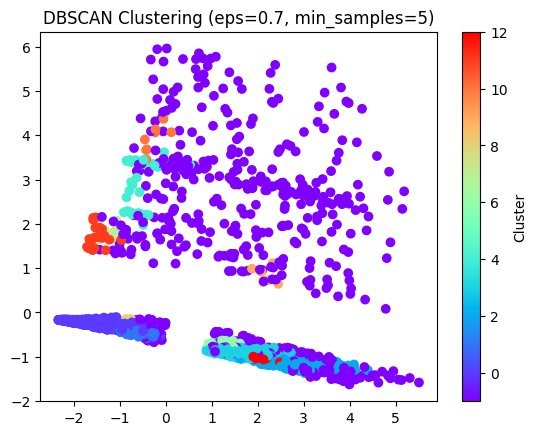

DBSCAN with eps=0.7, min_samples=5 formed 14 clusters


<ipython-input-28-28ae0680ca38>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_features)


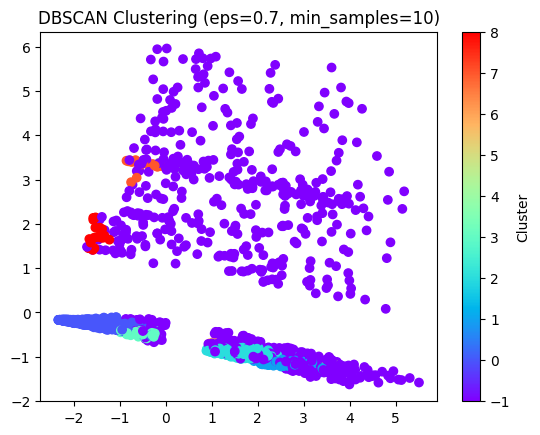

DBSCAN with eps=0.7, min_samples=10 formed 10 clusters


<ipython-input-28-28ae0680ca38>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_features)


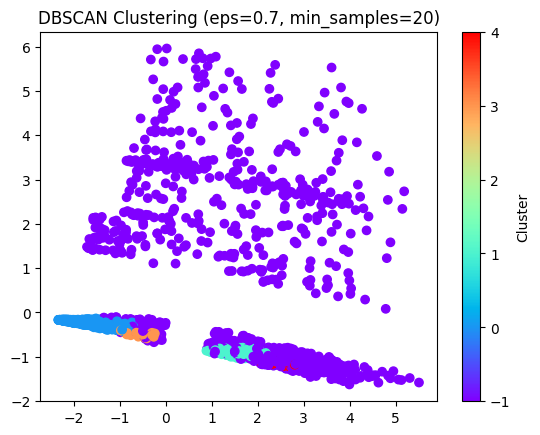

DBSCAN with eps=0.7, min_samples=20 formed 6 clusters


In [28]:
# Experiment with different eps and min_samples
eps_values = [0.3, 0.5, 0.7]
min_samples_values = [5, 10, 20]

# Trying different combinations of eps and min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        plane['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_features)

        # Visualizing the DBSCAN clustering result
        plt.scatter(pca_components[:, 0], pca_components[:, 1], c=plane['DBSCAN_Cluster'], cmap='rainbow')
        plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
        plt.colorbar(label='Cluster')
        plt.show()

        # Checking the number of clusters formed
        n_clusters = len(set(plane['DBSCAN_Cluster'])) - (1 if -1 in plane['DBSCAN_Cluster'] else 0)
        print(f'DBSCAN with eps={eps}, min_samples={min_samples} formed {n_clusters} clusters')

In [29]:
!pip install scikit-learn
from sklearn.cluster import KMeans

# Performing KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
plane['KMeans_Cluster'] = kmeans.fit_predict(scaled_features)

# silhouette score
from sklearn.metrics import silhouette_score
kmeans_sil_score = silhouette_score(scaled_features, plane['KMeans_Cluster'])
print(f'K-Means Silhouette Score: {kmeans_sil_score}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-29-143b64757f7f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane['KMeans_Cluster'] = kmeans.fit_predict(scaled_features)


K-Means Silhouette Score: 0.46037898503170105


In [30]:
from sklearn.metrics import silhouette_score
# Silhouette Score for K-Means
kmeans_sil_score = silhouette_score(scaled_features, plane['KMeans_Cluster'])
print(f'K-Means Silhouette Score: {kmeans_sil_score}')

# Silhouette Score for Hierarchical Clustering
hier_sil_score = silhouette_score(scaled_features, plane['Hierarchical_Cluster'])
print(f'Hierarchical Clustering Silhouette Score: {hier_sil_score}')

# Silhouette Score for DBSCAN (ignoring noise points)
dbscan_sil_score = silhouette_score(scaled_features[plane['DBSCAN_Cluster'] != -1],
                                    plane['DBSCAN_Cluster'][plane['DBSCAN_Cluster'] != -1])
print(f'DBSCAN Silhouette Score: {dbscan_sil_score}')

K-Means Silhouette Score: 0.46037898503170105
Hierarchical Clustering Silhouette Score: 0.4466892219514323
DBSCAN Silhouette Score: 0.2008776528464951


In [33]:
# Analyzing the size of each K-Means cluster
print("K-Means Cluster Sizes:")
print(plane['KMeans_Cluster'].value_counts())

# Analyzing the feature means for each cluster
kmeans_cluster_means = plane.groupby('KMeans_Cluster').mean()
print("\nK-Means Cluster Feature Means:")
print(kmeans_cluster_means)

K-Means Cluster Sizes:
KMeans_Cluster
1    1662
2     849
0     364
Name: count, dtype: int64

K-Means Cluster Feature Means:
                        ID#       Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                                
0               2030.184066  64603.758242         0.0   2.032967        1.0   
1               2298.738869  28238.912756         0.0   1.082431        1.0   
2               1787.663133  75638.415783         0.0   3.206125        1.0   

                cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
KMeans_Cluster                                                            
0                     1.0  14108.711538    11.653846         420.763736   
1                     1.0   2887.952467     5.404934           3.468111   
2                     1.0  25116.992933    16.206125           6.122497   

                Flight_trans_12  Days_since_enroll    Award?  Cluster  \
KMeans_Cluster               

**K-Means Clustering Insights:**

The airline's loyalty program has three clusters: Cluster 0, consisting of frequent flyers with high miles and loyalty awards, Cluster 1, consisting of occasional flyers with moderate miles and some engagement, and Cluster 2, consisting of infrequent flyers with low miles and no awards.

In [37]:
# Analyzing the size of each Hierarchical cluster
print("Hierarchical Cluster Sizes:")
print(plane['Hierarchical_Cluster'].value_counts())

# Analyzing the feature means for each cluster
hierarchical_cluster_means = plane.groupby('Hierarchical_Cluster').mean()
print("\nHierarchical Cluster Feature Means:")
print(hierarchical_cluster_means)

Hierarchical Cluster Sizes:
Hierarchical_Cluster
1    1610
2     803
0     462
Name: count, dtype: int64

Hierarchical Cluster Feature Means:
                              ID#       Balance  Qual_miles  cc1_miles  \
Hierarchical_Cluster                                                     
0                     2017.883117  61907.989177         0.0   2.045455   
1                     2299.678261  28201.387578         0.0   1.085093   
2                     1796.354919  75541.881694         0.0   3.199253   

                      cc2_miles  cc3_miles   Bonus_miles  Bonus_trans  \
Hierarchical_Cluster                                                    
0                           1.0        1.0  14316.190476    11.413420   
1                           1.0        1.0   2892.008696     5.445963   
2                           1.0        1.0  24893.475716    16.118306   

                      Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
Hierarchical_Cluster                      

**Hierarchical Clustering Insights:**

Cluster 0 represents high-value customers, such as business travelers or long-haul passengers, with distinctive traits like higher expenditure and premium services use. Cluster 1 includes mid-tier flyers with occasional and frequent patterns, representing the airline's core user base. Cluster 2 includes new or infrequent flyers with low engagement, indicating that targeted promotions could convert them into repeat customers.

In [36]:
# Analyzing the size of each DBSCAN cluster (with -1 as noise)
print("DBSCAN Cluster Sizes (with -1 as noise):")
print(plane['DBSCAN_Cluster'].value_counts())

# Analyzing the feature means for each cluster (ignoring noise points)
dbscan_cluster_means = plane[plane['DBSCAN_Cluster'] != -1].groupby('DBSCAN_Cluster').mean()
print("\nDBSCAN Cluster Feature Means (excluding noise):")
print(dbscan_cluster_means)

DBSCAN Cluster Sizes (with -1 as noise):
DBSCAN_Cluster
 0    1384
-1    1024
 1     300
 3      98
 4      48
 2      21
Name: count, dtype: int64

DBSCAN Cluster Feature Means (excluding noise):
                        ID#       Balance  Qual_miles  cc1_miles  cc2_miles  \
DBSCAN_Cluster                                                                
0               2325.071532  23681.234104         0.0        1.0        1.0   
1               2004.623333  55335.230000         0.0        3.0        1.0   
2                799.428571  84371.428571         0.0        4.0        1.0   
3               2282.520408  32845.693878         0.0        2.0        1.0   
4               2098.916667  51605.583333         0.0        4.0        1.0   

                cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
DBSCAN_Cluster                                                            
0                     1.0   1902.007225     4.461705                0.0   
1                     1.

**DBSCAN Clustering Insights:**

DBSCAN categorizes frequent flyers into three clusters: Cluster 0, which is dense and frequent, and Cluster 1, which is irregular but closely grouped. Outliers, labeled as -1, may include irregular or unique flyers with unusual travel patterns or inconsistent behavior across features.

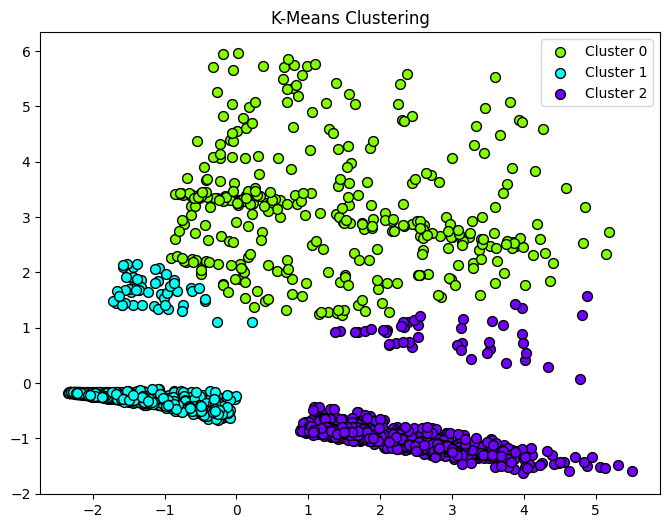

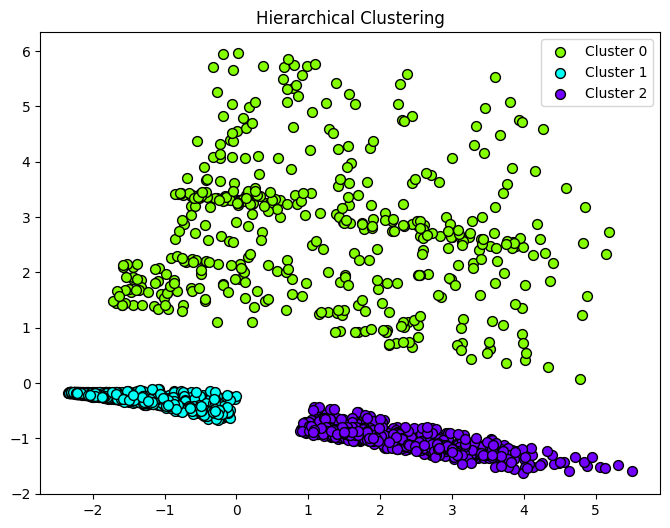

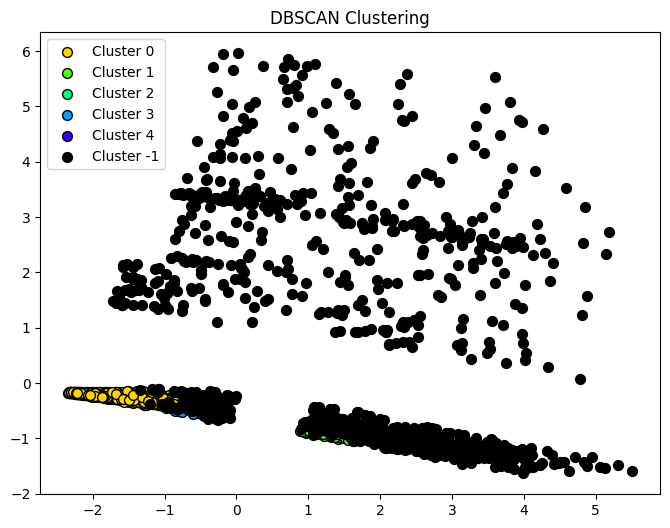

In [38]:
# Reducing data to 2D using PCA for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# Plotting function
def plot_clusters(reduced_features, labels, title):
    plt.figure(figsize=(8, 6))
    unique_labels = set(labels)
    colors = sns.color_palette("hsv", len(unique_labels))

    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black color for noise in DBSCAN
            col = [0, 0, 0, 1]

        # Plotting the points in each cluster
        class_member_mask = (labels == k)
        plt.scatter(reduced_features[class_member_mask, 0], reduced_features[class_member_mask, 1],
                    color=col, label=f'Cluster {k}', s=50, edgecolor='k')

    plt.title(title)
    plt.legend()
    plt.show()

# Visualization for K-Means
plot_clusters(reduced_features, plane['KMeans_Cluster'], "K-Means Clustering")

# Visualization for Hierarchical Clustering
plot_clusters(reduced_features, plane['Hierarchical_Cluster'], "Hierarchical Clustering")

# Visualization for DBSCAN (excluding noise points)
plot_clusters(reduced_features, plane['DBSCAN_Cluster'], "DBSCAN Clustering")

In [39]:
# Silhouette Score for K-Means
kmeans_sil_score = silhouette_score(scaled_features, plane['KMeans_Cluster'])
print(f'K-Means Silhouette Score: {kmeans_sil_score}')

# Silhouette Score for DBSCAN (ignoring noise points)
dbscan_labels = plane['DBSCAN_Cluster']
dbscan_non_noise = dbscan_labels != -1  # Exclude noise points (-1)
dbscan_sil_score = silhouette_score(scaled_features[dbscan_non_noise], dbscan_labels[dbscan_non_noise])
print(f'DBSCAN Silhouette Score (excluding noise): {dbscan_sil_score}')

K-Means Silhouette Score: 0.46037898503170105
DBSCAN Silhouette Score (excluding noise): 0.2008776528464951
